In [1]:
from net.parse import *
from net import *

In [2]:
DELTA = 3
CONTEXT = 10

In [3]:
# Build dataset
trends = merge_on_date(parse_path(Path('../data/trends'))) # Parse trends data
stats = get_data() # Parse stats data
x_train, y_train, x_test, y_test, mean, std = build_data(trends, stats, DELTA, CONTEXT)

/Users/tudor/CS-Work/ML/P3/VFNN/src/net/parse/finance_parser.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  daily = yf.download(tickers='^SPX', start=start, end=end, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Model Hyperparameters
HIDDEN = 256
INPUT_SIZE = 28 # Fixed
MLP_SIZE = (256, 1) # Has to end in 1
BATCH_SIZE = 32
STEPS = 10000
LR = 1e-2
LAMBDA_ = 1e-4

In [5]:
# Initialize
model = VFNN(HIDDEN, INPUT_SIZE, MLP_SIZE)

Loss: 0.029073184356093407 on step: 1
Loss: 0.03521399199962616 on step: 101
Loss: 0.041351161897182465 on step: 201
Loss: 0.048023372888565063 on step: 301
Loss: 0.02549552172422409 on step: 401
Loss: 0.022719888016581535 on step: 501
Loss: 0.03134084492921829 on step: 601
Loss: 0.03514571487903595 on step: 701
Loss: 0.023747794330120087 on step: 801
Loss: 0.02368641085922718 on step: 901
Loss: 0.025401366874575615 on step: 1001
Loss: 0.022062158212065697 on step: 1101
Loss: 0.02541666105389595 on step: 1201
Loss: 0.03011663630604744 on step: 1301
Loss: 0.03181382641196251 on step: 1401
Loss: 0.026330750435590744 on step: 1501
Loss: 0.024552414193749428 on step: 1601
Loss: 0.033743008971214294 on step: 1701
Loss: 0.030740290880203247 on step: 1801
Loss: 0.053390610963106155 on step: 1901
Loss: 0.025667350739240646 on step: 2001
Loss: 0.028744062408804893 on step: 2101
Loss: 0.031810466200113297 on step: 2201
Loss: 0.023963196203112602 on step: 2301
Loss: 0.02972571551799774 on step: 2

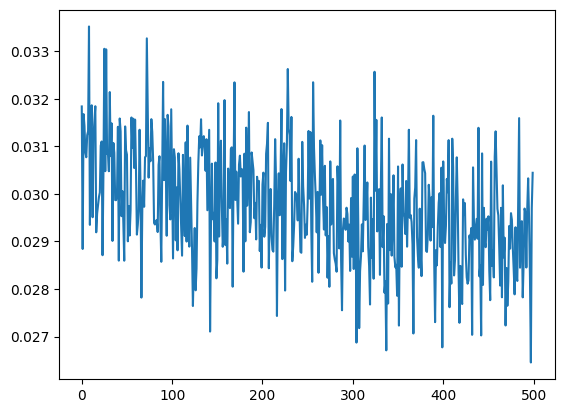

In [33]:
# Train
model.train()
lossi = adam(model, RMSE, x_train, y_train, LR * 0.1, LAMBDA_, BATCH_SIZE, STEPS * 5)

# Plot loss
from matplotlib import pyplot as plt
plt.plot(torch.tensor(lossi).view(-1, 100).mean(1))

In [62]:
def MAPE_test(preds: torch.Tensor, acc: torch.Tensor):
    """
    Mean absolute percentage error
    """
    return 100 * torch.abs((preds - acc) / (torch.abs(acc) + torch.abs(preds))).mean()


In [ ]:
model.eval()
vals = model.forward(x_train)
percents = (vals.flatten() * std[:, -2] + mean[:, -2]) / 1e4
targs = (y_train.flatten() * std[:, -2] + mean[:, -2]) / 1e4
loss = RMSE(percents, targs)
print(loss.item())
print(MAPE_test(percents * 1e4, targs * 1e4).item())

0.0006542015471495688
nan


In [ ]:
model.eval()
vals = model.forward(x_test)
percents = (vals.flatten() * std[:, -2] + mean[:, -2]) / 1e4
targs = (y_test.flatten() * std[:, -2] + mean[:, -2]) / 1e4
loss = RMSE(percents, targs)
print(loss.item())
print(MAPE_test(percents * 1e4, targs * 1e4).item())


0.006120618432760239
nan


Text(0.5, 1.0, 'Target Distribution (Unnormalized)')

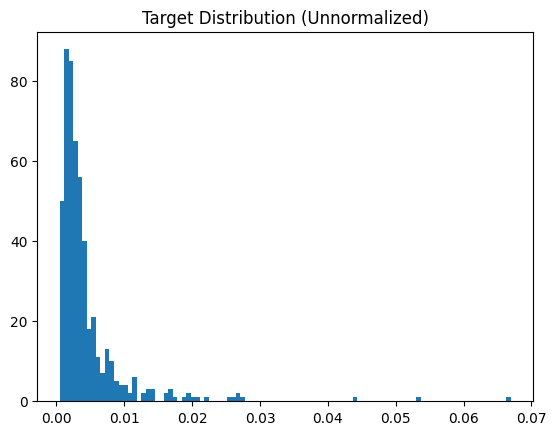

In [ ]:
plt.hist(targs.numpy(), bins=100)
plt.title("Target Distribution (Unnormalized)")


Text(0.5, 1.0, 'Target Distribution (Unnormalized)')

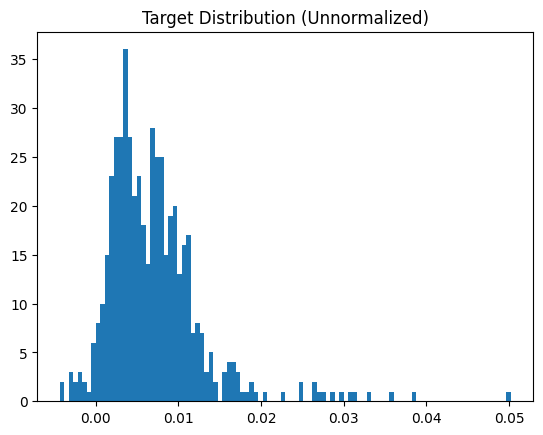

In [ ]:
plt.hist(percents.detach().numpy(), bins=100)
plt.title("Target Distribution (Unnormalized)")

Text(0, 0.5, 'Absolute Error')

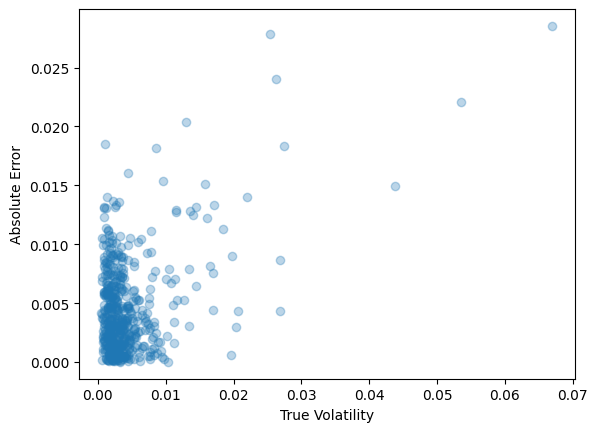

In [ ]:
plt.scatter(targs.numpy(), (percents.detach() - targs).abs().numpy(), alpha=0.3)
plt.xlabel("True Volatility")
plt.ylabel("Absolute Error")
